In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
gen1 = catalog.load('gen1_p')
gen2 = catalog.load('gen2_p')
wea1 = catalog.load('gen1_w')
wea2 = catalog.load('gen2_w')

2021-09-26 20:45:22,584 - kedro.io.data_catalog - INFO - Loading data from `gen1_p` (CSVDataSet)...
2021-09-26 20:45:23,405 - kedro.io.data_catalog - INFO - Loading data from `gen2_p` (CSVDataSet)...
2021-09-26 20:45:23,503 - kedro.io.data_catalog - INFO - Loading data from `gen1_w` (CSVDataSet)...
2021-09-26 20:45:23,513 - kedro.io.data_catalog - INFO - Loading data from `gen2_w` (CSVDataSet)...


In [9]:
pd.to_datetime(gen1.DATE_TIME).dt.floor('T')[100] == pd.to_datetime(gen2.DATE_TIME).dt.floor('T')[100]

True

In [3]:
gen1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [4]:
gen2.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [5]:
wea1.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [6]:
wea2.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


In [7]:
gen1.isnull().any()

DATE_TIME      False
PLANT_ID       False
SOURCE_KEY     False
DC_POWER       False
AC_POWER       False
DAILY_YIELD    False
TOTAL_YIELD    False
dtype: bool

In [8]:
gen2.isnull().any()

DATE_TIME      False
PLANT_ID       False
SOURCE_KEY     False
DC_POWER       False
AC_POWER       False
DAILY_YIELD    False
TOTAL_YIELD    False
dtype: bool

In [9]:
wea1.isnull().any()

DATE_TIME              False
PLANT_ID               False
SOURCE_KEY             False
AMBIENT_TEMPERATURE    False
MODULE_TEMPERATURE     False
IRRADIATION            False
dtype: bool

In [10]:
wea2.isnull().any()

DATE_TIME              False
PLANT_ID               False
SOURCE_KEY             False
AMBIENT_TEMPERATURE    False
MODULE_TEMPERATURE     False
IRRADIATION            False
dtype: bool

In [11]:
gen1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [12]:
wea1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [13]:
gen1['DATE_TIME'] = pd.to_datetime(gen1['DATE_TIME'], format = '%d-%m-%Y %H:%M').dt.floor('T')

In [14]:
gen1 = gen1[['DATE_TIME','PLANT_ID','SOURCE_KEY','DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD']]

In [15]:
wea1['DATE_TIME'] = pd.to_datetime(wea1['DATE_TIME'], format = '%Y-%m-%d %H:%M:%S').dt.floor('T')

In [16]:
wea1 = wea1[['DATE_TIME','PLANT_ID','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]

In [17]:
wea1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   AMBIENT_TEMPERATURE  3182 non-null   float64       
 3   MODULE_TEMPERATURE   3182 non-null   float64       
 4   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 124.4 KB


In [18]:
checker = gen1.DC_POWER.max()/gen1.AC_POWER.max() - 1 > 1

In [8]:
for item in [gen1,gen2]:
    print(item.DC_POWER.max()/item.AC_POWER.max() - 1 > 1)

True
False


In [19]:
if checker:
    gen1.DC_POWER = gen1.DC_POWER/10

2021-09-21 00:04:14,283 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


In [20]:
gen1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,314.742621,307.802752,3295.968737,6.978712e+06
std,0.0,403.645717,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,42.900000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,636.696429,623.618750,6274.000000,7.268706e+06
max,4135001.0,1447.112500,1410.950000,9163.000000,7.846821e+06


    will use the above as a check to determine if there is a measurement discrepancy between DC/AC power reported.
    
    Research suggests (as of 6-7 years ago) that the amount of loss from panels at the initial inverter are roughly 3-6% with optimal efficiency not 90% as in the case of station-1. This suggests instrument error in reporting the values for the period of time.
    This is further supported by the fact that a station of panels that are only a year and half older are still well within their range of optimal functionality and are showing a power loss of only 2.5% which is good. If we were to use Station 1 alone this would suggest a serious issue/error at the inverter level with MOST of the energy being produced getting lost.

In [21]:
gen1.set_index('DATE_TIME', inplace=True)
wea1.set_index('DATE_TIME', inplace=True)

In [22]:
temp = gen1.index.unique().tolist()

In [23]:
key_info ={}
for key in gen1.SOURCE_KEY.unique().tolist():
    data = gen1[gen1.SOURCE_KEY == key]
    merged = pd.merge(data, wea1, left_on=[data.index,'PLANT_ID'], right_on=[wea1.index,'PLANT_ID'])
    merged = merged.set_index(pd.DatetimeIndex(merged['key_0'])).drop(['key_0'], axis=1)
    key_info[key] = merged.resample('15T', origin=temp[0]).interpolate(method='spline', order=3, limit_direction='backward')
    

In [24]:
key_info[gen1.SOURCE_KEY.unique()[1]].head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
key_0,,,,,,,,,
2020-05-15 00:00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2020-05-15 00:15:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.084589,22.761668,0.0
2020-05-15 00:30:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,24.935753,22.592306,0.0
2020-05-15 00:45:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,24.846130,22.360852,0.0
2020-05-15 01:00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,24.621525,22.165423,0.0


In [25]:
[val.describe() for val in key_info.values()]

[           PLANT_ID     DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
 count  3.264000e+03  3264.000000  3264.000000  3264.000000  3.264000e+03   
 mean   4.135001e+06   288.660437   282.431112  3261.436384  6.375448e+06   
 std    1.582685e-08   379.588168   371.154452  2935.970131  6.701485e+04   
 min    4.135001e+06  -176.740860  -174.391709    -4.017744  6.259559e+06   
 25%    4.135001e+06     0.000000     0.000000     5.741071  6.316078e+06   
 50%    4.135001e+06    29.652679    28.671514  3090.625000  6.377931e+06   
 75%    4.135001e+06   580.734375   569.131250  5911.000000  6.435140e+06   
 max    4.135001e+06  1333.514286  1300.171429  8268.000000  6.485319e+06   
 
        AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
 count          3264.000000         3264.000000  3264.000000  
 mean             25.494336           30.880030     0.230736  
 std               3.358827           12.357541     0.296316  
 min              20.398505           11.947634     0

    Here are some thoughts:
    
    There is no null data however doing some deeper investigation shows that there is indeed missing data.
    by resampling the daterange there are time periods that are missing.
    
    
    how to tackle this:
        One thing to consider is that this is not necessarily true for each inverter.
        Some inverters are missing more information than others

In [26]:
tester = pd.concat(key_info.values(), axis=0)

In [27]:
tester

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
key_0,,,,,,,,,
2020-05-15 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
2020-05-15 00:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.084589,22.761668,0.0
2020-05-15 00:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,24.935753,22.592306,0.0
2020-05-15 00:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,24.846130,22.360852,0.0
2020-05-15 01:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,24.621525,22.165423,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-17 22:45:00,4135001.0,YxYtjZvoooNbGkE,0.0,0.0,5886.0,7425442.0,22.150570,21.480377,0.0
2020-06-17 23:00:00,4135001.0,YxYtjZvoooNbGkE,0.0,0.0,5886.0,7425442.0,22.129816,21.389024,0.0
2020-06-17 23:15:00,4135001.0,YxYtjZvoooNbGkE,0.0,0.0,5886.0,7425442.0,22.008275,20.709211,0.0


In [28]:
trend_dict = {pos: val+1 for val, pos in enumerate(tester.index.unique().tolist())}

In [29]:
tester['TREND'] = tester.index.map(trend_dict)

In [30]:
tester

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TREND
key_0,,,,,,,,,,
2020-05-15 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,1
2020-05-15 00:15:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.084589,22.761668,0.0,2
2020-05-15 00:30:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,24.935753,22.592306,0.0,3
2020-05-15 00:45:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,24.846130,22.360852,0.0,4
2020-05-15 01:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,24.621525,22.165423,0.0,5
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 22:45:00,4135001.0,YxYtjZvoooNbGkE,0.0,0.0,5886.0,7425442.0,22.150570,21.480377,0.0,3260
2020-06-17 23:00:00,4135001.0,YxYtjZvoooNbGkE,0.0,0.0,5886.0,7425442.0,22.129816,21.389024,0.0,3261
2020-06-17 23:15:00,4135001.0,YxYtjZvoooNbGkE,0.0,0.0,5886.0,7425442.0,22.008275,20.709211,0.0,3262


In [31]:
daily_agg = {}

for key, value in key_info.items():
    pid = value.PLANT_ID.unique().tolist()[0]
    data = value.reset_index().groupby(pd.Grouper(key='key_0', freq='1D')).agg({'IRRADIATION':'mean', 'MODULE_TEMPERATURE':'mean','AMBIENT_TEMPERATURE':'mean','DAILY_YIELD':'max','DC_POWER':'sum','AC_POWER':'sum'})
    data['PLANT_ID'] = pid
    data['SOURCE_KEY'] = key
    daily_agg[key] = data

In [32]:
daily_agg

{'1BY6WEcLGh8j5v7':             IRRADIATION  MODULE_TEMPERATURE  AMBIENT_TEMPERATURE  DAILY_YIELD  \
 key_0                                                                           
 2020-05-15     0.204615           32.208400            27.251715  5754.000000   
 2020-05-16     0.211178           30.923284            26.287560  6292.000000   
 2020-05-17     0.238869           32.740435            26.686727  7045.000000   
 2020-05-18     0.159026           27.814344            23.850938  4998.000000   
 2020-05-19     0.195304           30.221426            25.470133  6449.000000   
 2020-05-20     0.240547           31.799978            25.822269  8249.000000   
 2020-05-21     0.324408           30.852505            26.089734  7883.370075   
 2020-05-22     0.230408           32.478885            26.526703  6848.000000   
 2020-05-23     0.290409           33.949737            26.693492  7966.243479   
 2020-05-24     0.259762           33.978544            27.625116  7537.000000 

In [33]:
daily_tester = pd.concat(daily_agg.values(), axis=0)

In [34]:
daily_tester

,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,DAILY_YIELD,DC_POWER,AC_POWER,PLANT_ID,SOURCE_KEY
key_0,,,,,,,,
2020-05-15,0.204615,32.208400,27.251715,5754.0,23532.085365,23046.264375,4135001.0,1BY6WEcLGh8j5v7
2020-05-16,0.211178,30.923284,26.287560,6292.0,25657.174128,25119.747350,4135001.0,1BY6WEcLGh8j5v7
2020-05-17,0.238869,32.740435,26.686727,7045.0,28803.982144,28172.850000,4135001.0,1BY6WEcLGh8j5v7
2020-05-18,0.159026,27.814344,23.850938,4998.0,20403.030357,19970.507143,4135001.0,1BY6WEcLGh8j5v7
2020-05-19,0.195304,30.221426,25.470133,6449.0,24543.806913,24034.354089,4135001.0,1BY6WEcLGh8j5v7
...,...,...,...,...,...,...,...,...
2020-06-13,0.264472,30.481026,24.566729,8380.0,33878.675001,33109.141072,4135001.0,YxYtjZvoooNbGkE
2020-06-14,0.220086,29.421707,24.412891,7263.0,29598.932143,28957.083928,4135001.0,YxYtjZvoooNbGkE
2020-06-15,0.205925,29.927817,24.827414,6633.0,26608.587500,26040.882143,4135001.0,YxYtjZvoooNbGkE


In [35]:
daily_trend = {pos: val+1 for val, pos in enumerate(daily_tester.index.unique().tolist())}

In [36]:
daily_tester['TREND'] = daily_tester.index.map(daily_trend)

In [37]:
daily_tester

,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,DAILY_YIELD,DC_POWER,AC_POWER,PLANT_ID,SOURCE_KEY,TREND
key_0,,,,,,,,,
2020-05-15,0.204615,32.208400,27.251715,5754.0,23532.085365,23046.264375,4135001.0,1BY6WEcLGh8j5v7,1
2020-05-16,0.211178,30.923284,26.287560,6292.0,25657.174128,25119.747350,4135001.0,1BY6WEcLGh8j5v7,2
2020-05-17,0.238869,32.740435,26.686727,7045.0,28803.982144,28172.850000,4135001.0,1BY6WEcLGh8j5v7,3
2020-05-18,0.159026,27.814344,23.850938,4998.0,20403.030357,19970.507143,4135001.0,1BY6WEcLGh8j5v7,4
2020-05-19,0.195304,30.221426,25.470133,6449.0,24543.806913,24034.354089,4135001.0,1BY6WEcLGh8j5v7,5
...,...,...,...,...,...,...,...,...,...
2020-06-13,0.264472,30.481026,24.566729,8380.0,33878.675001,33109.141072,4135001.0,YxYtjZvoooNbGkE,30
2020-06-14,0.220086,29.421707,24.412891,7263.0,29598.932143,28957.083928,4135001.0,YxYtjZvoooNbGkE,31
2020-06-15,0.205925,29.927817,24.827414,6633.0,26608.587500,26040.882143,4135001.0,YxYtjZvoooNbGkE,32


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

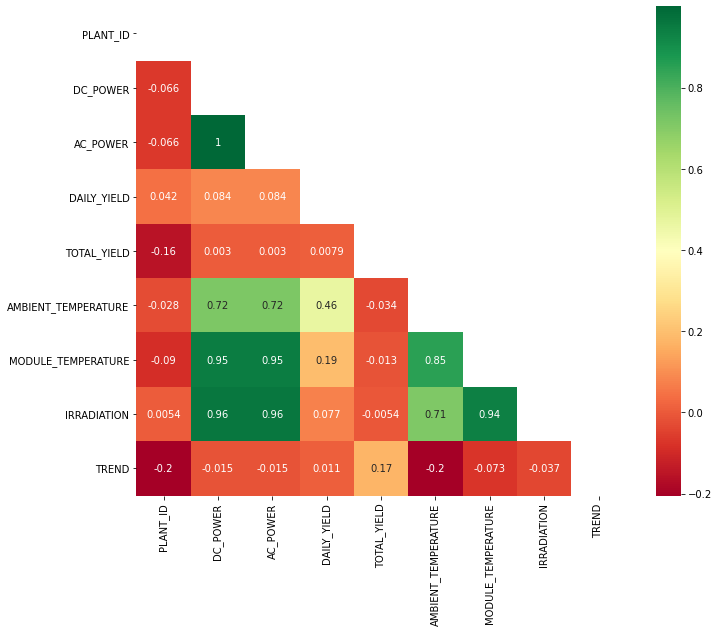

In [39]:
c = tester.corr()
mask = np.triu(np.ones_like(c))

_, ax = plt.subplots(figsize=(11,9))

sns.heatmap(c, mask=mask, cmap='RdYlGn',square=True, annot=True)
plt.show()

In [8]:
c2 = daily_tester.corr(method='spearman')
mask = np.triu(np.ones_like(c2))
_, ax = plt.subplots(figsize=(11,9))

sns.heatmap(c2, cmap='RdYlGn',square=True, annot=True)
plt.show()

NameError: name 'daily_tester' is not defined

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

/home/thomas/anaconda3/envs/kedro-env/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [42]:
endog = daily_tester[daily_tester.SOURCE_KEY == '1BY6WEcLGh8j5v7'][['DAILY_YIELD']]
exog = daily_tester[daily_tester.SOURCE_KEY == '1BY6WEcLGh8j5v7'][['IRRADIATION','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE','DC_POWER','AC_POWER','TREND']] 

In [43]:
exog

,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,DC_POWER,AC_POWER,TREND
key_0,,,,,,
2020-05-15,0.204615,32.208400,27.251715,23532.085365,23046.264375,1
2020-05-16,0.211178,30.923284,26.287560,25657.174128,25119.747350,2
2020-05-17,0.238869,32.740435,26.686727,28803.982144,28172.850000,3
2020-05-18,0.159026,27.814344,23.850938,20403.030357,19970.507143,4
2020-05-19,0.195304,30.221426,25.470133,24543.806913,24034.354089,5
2020-05-20,0.240547,31.799978,25.822269,33872.635807,33147.272929,6
2020-05-21,0.324408,30.852505,26.089734,54793.340955,53725.234464,7
2020-05-22,0.230408,32.478885,26.526703,28080.907142,27456.633929,8
2020-05-23,0.290409,33.949737,26.693492,32748.110559,32020.689247,9


In [44]:
def calc_vif(X):
    vif_frame = pd.DataFrame()
    vif_frame['features'] = X.columns
    vif_frame['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
    return vif_frame.round(3)

In [45]:
calc_vif(exog)

,features,VIF
0,IRRADIATION,205.129
1,MODULE_TEMPERATURE,6227.255
2,AMBIENT_TEMPERATURE,5068.217
3,DC_POWER,2709422.549
4,AC_POWER,2697671.939
5,TREND,4.292


In [46]:
calc_vif(exog[['IRRADIATION','AMBIENT_TEMPERATURE','AC_POWER','TREND']])

,features,VIF
0,IRRADIATION,75.030
1,AMBIENT_TEMPERATURE,44.086
2,AC_POWER,47.063
3,TREND,4.016


In [47]:
calc_vif(exog[['AMBIENT_TEMPERATURE','TREND']])

,features,VIF
0,AMBIENT_TEMPERATURE,3.801
1,TREND,3.801


In [48]:
exog[['AMBIENT_TEMPERATURE','TREND']].corr()

,AMBIENT_TEMPERATURE,TREND
AMBIENT_TEMPERATURE,1.000000,-0.658953
TREND,-0.658953,1.000000


In [49]:
calc_vif(exog[['IRRADIATION','TREND']])

,features,VIF
0,IRRADIATION,3.337
1,TREND,3.337


In [50]:
exog[['IRRADIATION','TREND']].corr()

,IRRADIATION,TREND
IRRADIATION,1.000000,-0.236766
TREND,-0.236766,1.000000


In [51]:
from statsmodels.api import OLS, add_constant
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

In [52]:
def cust_accuracy(mape):
    return 1-mape



def tss_rfe(y, X, lower_b, upper_b, splits=10):
    nof_list = np.arange(lower_b, upper_b)
    best_mape = 0
    nof = 0
    score_dict = {}
    tscv = TimeSeriesSplit(n_splits=splits, test_size=1)


    #first iterate over number of features to be used
    for n in nof_list:
        estimator = LinearRegression()
        rfe = RFE(estimator, n)
        rfe_X = rfe.fit_transform(X, y)
        #second do the back testing iteration over the TS split
        y_true = []
        y_pred = []
        
        for tridx, teidx in tscv.split(rfe_X):
            X_tr, X_te = rfe_X[tridx], rfe_X[teidx]
            y_tr, y_te = y.iloc[tridx].values, y.iloc[teidx].values
            
            #train the model
            estimator.fit(X_tr, y_tr)
            pred = estimator.predict(X_te)
            noneg = max(0,pred)[0] 
            
            y_true.extend(y_te)
            y_pred.extend(noneg)
            
            #print(y_te)
        score_dict[n] = cust_accuracy(mean_absolute_percentage_error(y_true,y_pred))
    best_res = {num: mape for num, mape in score_dict.items() if (mape == max(score_dict.values()))}
    return score_dict
            
            
            
def get_rfe_features(y, X, n_features):
    cols = X.columns.tolist()

    estimator = LinearRegression()
    rfe = RFE(estimator, n_features)
    rfe_X = rfe.fit_transform(X,y)

    temp = pd.Series(rfe.support_, index = cols)
    selected_feats = temp[temp==True].index
    return selected_feats

In [53]:
tss_rfe(endog, exog[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','AC_POWER','DC_POWER']], 2, 6, 10)

/home/thomas/anaconda3/envs/kedro-env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/thomas/anaconda3/envs/kedro-env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/thomas/anaconda3/envs/kedro-env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/thomas/anaconda3/envs/kedro-env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: Fu

{2: 0.910230575596068,
 3: 0.9120723181979716,
 4: 0.9351113088813103,
 5: 0.9747610628809269}

In [54]:
get_rfe_features(endog, exog, 2)

/home/thomas/anaconda3/envs/kedro-env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Index(['IRRADIATION', 'MODULE_TEMPERATURE'], dtype='object')

In [55]:
get_rfe_features(endog, exog, 3)

/home/thomas/anaconda3/envs/kedro-env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Index(['IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE'], dtype='object')

In [56]:
get_rfe_features(endog, exog, 4)

/home/thomas/anaconda3/envs/kedro-env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Index(['IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE', 'AC_POWER'], dtype='object')

In [57]:
get_rfe_features(endog, exog, 5)

/home/thomas/anaconda3/envs/kedro-env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Index(['IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE', 'DC_POWER',
       'AC_POWER'],
      dtype='object')

In [58]:
def backtest_mlr(endo, exo, n_splits=10):
    y_true = []
    y_pred = []
    
    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=1)
    for tridx, teidx in tscv.split(exo):
        X_tr, X_te = add_constant(exo.iloc[tridx].values, has_constant='add', prepend=True), add_constant(exo.iloc[teidx].values, has_constant='add',prepend=True)
        y_tr, y_te = endo.iloc[tridx].values, endo.iloc[teidx].values
        
        model = OLS(y_tr,X_tr).fit()
        pred = model.predict(X_te)
        
        y_true.extend(y_te)
        y_pred.extend(pred)
    accuracy = cust_accuracy(mean_absolute_percentage_error(y_true,y_pred))
    final_model = OLS(endo, add_constant(exo, has_constant='add',prepend=True)).fit()
    print(f'Model Accuracy: {accuracy}\n')
    print(final_model.summary())
    

In [59]:
backtest_mlr(endog, exog[['IRRADIATION', 'TREND']])

Model Accuracy: 0.8961481275971966

                            OLS Regression Results                            
Dep. Variable:            DAILY_YIELD   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     25.78
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           2.54e-07
Time:                        00:05:18   Log-Likelihood:                -269.06
No. Observations:                  34   AIC:                             544.1
Df Residuals:                      31   BIC:                             548.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2

In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

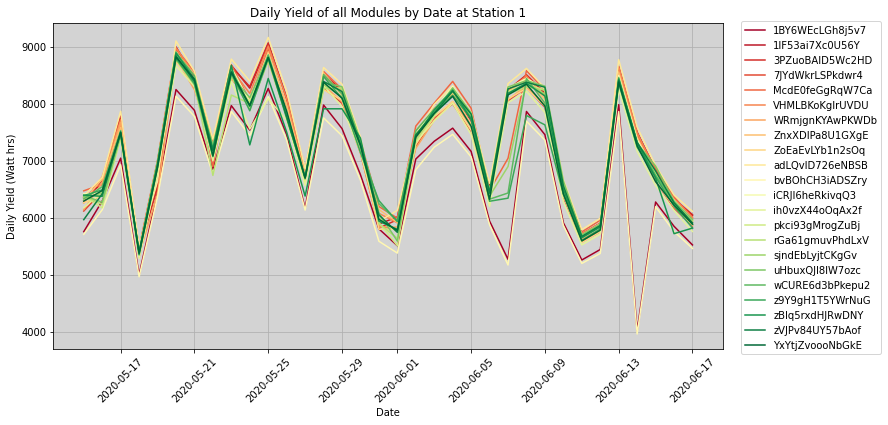

In [61]:
colors = [cm.RdYlGn(i) for i in np.linspace(0,1, len(daily_tester.SOURCE_KEY.unique())) ]
modules = daily_tester.SOURCE_KEY.unique().tolist()

_, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_facecolor('lightgray')


for clr, module in zip(colors, modules):
    
    data = daily_tester[daily_tester.SOURCE_KEY == module]
    
    ax.plot(data.index, data.DAILY_YIELD, marker='', linestyle='-', color=clr, label=module)

plt.xticks(rotation=45)
plt.title('Daily Yield of all Modules by Date at Station 1')
plt.ylabel('Daily Yield (Watt hrs)')
plt.xlabel('Date')
plt.legend(loc='upper left',bbox_to_anchor=(1.02,1.02))
plt.grid()
plt.show()



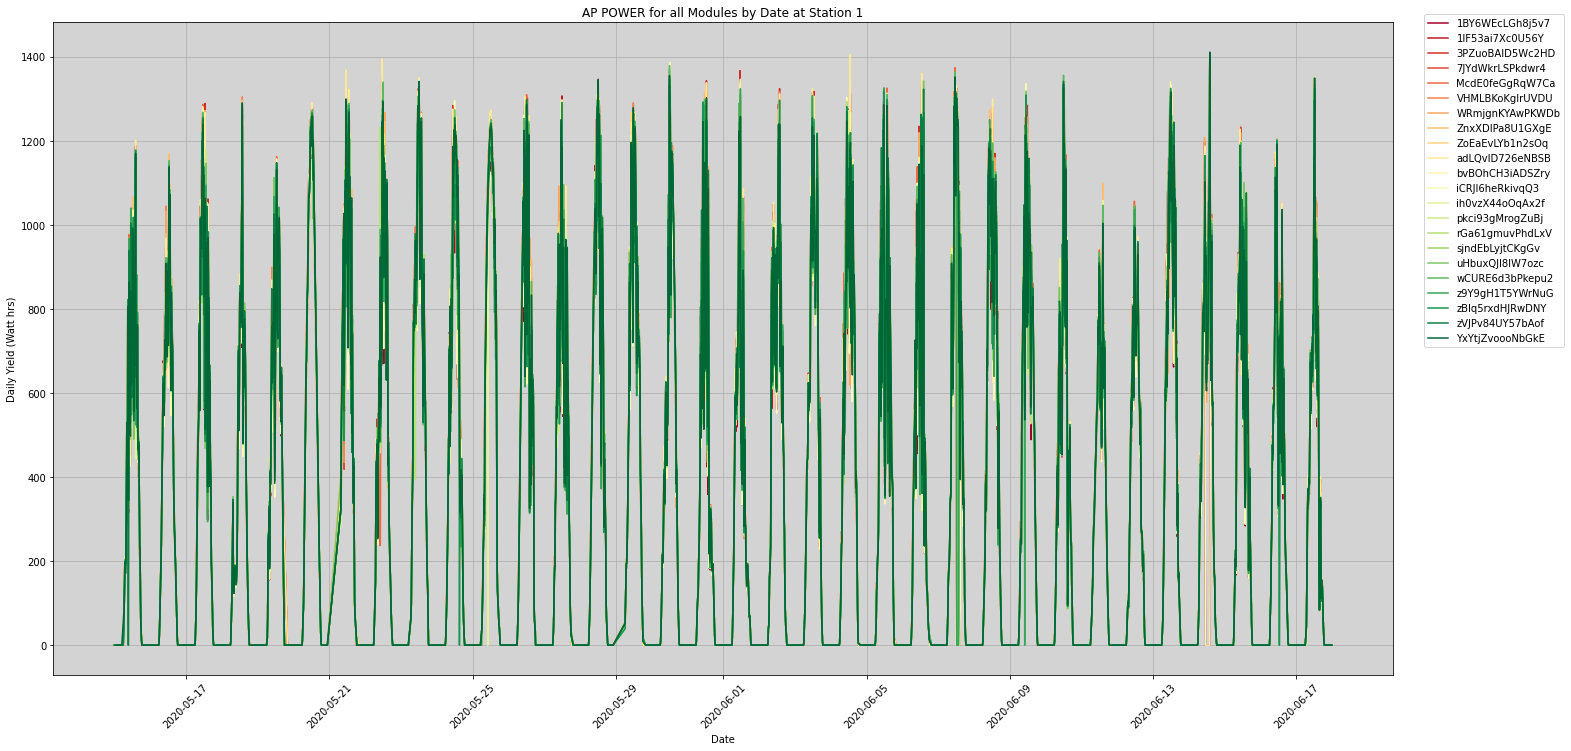

In [62]:
colors = [cm.RdYlGn(i) for i in np.linspace(0,1, len(daily_tester.SOURCE_KEY.unique())) ]
modules = daily_tester.SOURCE_KEY.unique().tolist()

_, ax = plt.subplots(1,1,figsize=(24,12))
ax.set_facecolor('lightgray')

for clr, module in zip(colors, modules):
    data = tester[tester.SOURCE_KEY == module]
    
    
    
    ax.plot(data.index, data.AC_POWER, marker='', linestyle='-', color=clr, label=module)

plt.xticks(rotation=45)
plt.title('AP POWER for all Modules by Date at Station 1')
plt.ylabel('Daily Yield (Watt hrs)')
plt.xlabel('Date')
plt.legend(loc='upper left',bbox_to_anchor=(1.02,1.02))
plt.grid()
plt.show()

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [64]:
from pandas.plotting import autocorrelation_plot
import itertools

In [65]:
def adf_test(tseries):
    series_test = adfuller(tseries, autolag='AIC')
    output_series = pd.Series(series_test[0:4], index=['Test Statistic','p-value','Number Lags Used','Numer of Observations Used'])
    for key, value in series_test[4].items():
        output_series[f'Critical Value ({key})'] = value
    print(output_series)
    

In [66]:
agg_data = tester.groupby(tester.index)['AC_POWER'].sum()

In [67]:
len(agg_data)/96

34.0

In [68]:
adf_test(agg_data)

Test Statistic               -1.338773e+01
p-value                       4.835517e-25
Number Lags Used              2.100000e+01
Numer of Observations Used    3.242000e+03
Critical Value (1%)          -3.432369e+00
Critical Value (5%)          -2.862432e+00
Critical Value (10%)         -2.567245e+00
dtype: float64


In [69]:
shifted = agg_data - agg_data.shift(1)

In [70]:
adf_test(shifted.dropna())

Test Statistic               -1.302893e+01
p-value                       2.367334e-24
Number Lags Used              2.800000e+01
Numer of Observations Used    3.234000e+03
Critical Value (1%)          -3.432374e+00
Critical Value (5%)          -2.862434e+00
Critical Value (10%)         -2.567246e+00
dtype: float64


Okay so in the above we can see that when we apply a first order differencing it shows stationarity in the data

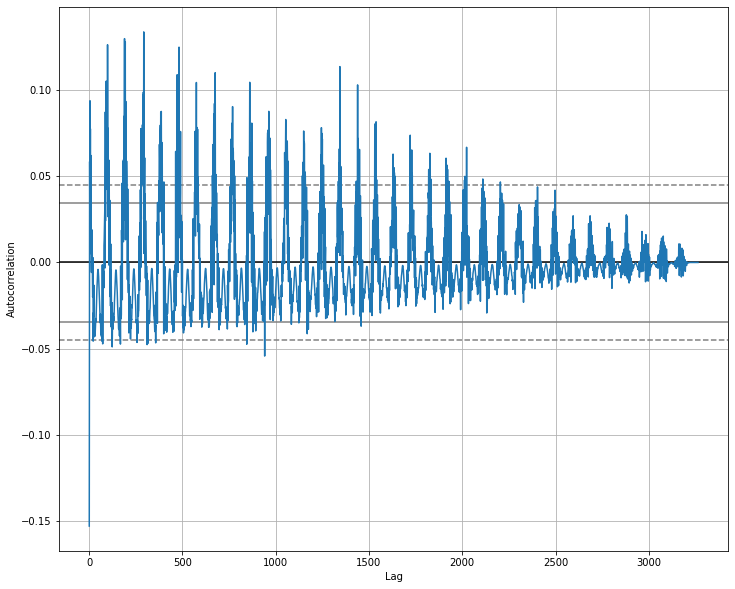

In [71]:
_, ax = plt.subplots(1,1,figsize=(12,10))
autocorrelation_plot(shifted.dropna(), ax=ax)
plt.show()

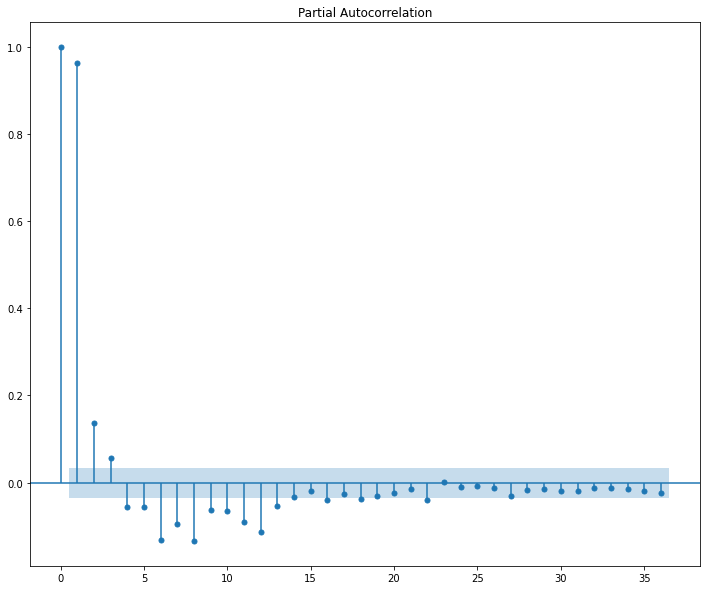

In [72]:
_, ax = plt.subplots(1,1,figsize=(12,10))
plot_pacf(agg_data, ax=ax)
plt.show()

In the above, we were trying to determine the behavior at the minute-level... This is too fine-grained and difficult for the model aka my computer to handle computationally for doing a sarimax gridsearch. Let's try determining an optimal approach on the daily aggregate.

In [73]:
temp_data = daily_tester[daily_tester.SOURCE_KEY == modules[-1]]
temp_data.head()

,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,DAILY_YIELD,DC_POWER,AC_POWER,PLANT_ID,SOURCE_KEY,TREND
key_0,,,,,,,,,
2020-05-15,0.250131,32.572435,27.139882,6291.0,25983.453443,25445.740308,4135001.0,YxYtjZvoooNbGkE,1
2020-05-16,0.212440,30.892950,26.249830,6475.0,26432.421554,25874.323228,4135001.0,YxYtjZvoooNbGkE,2
2020-05-17,0.238869,32.740435,26.686727,7497.0,30603.141071,29926.631547,4135001.0,YxYtjZvoooNbGkE,3
2020-05-18,0.159026,27.814344,23.850938,5369.0,21877.528572,21409.658929,4135001.0,YxYtjZvoooNbGkE,4
2020-05-19,0.195540,30.064499,25.426764,6878.0,26641.048902,26081.230249,4135001.0,YxYtjZvoooNbGkE,5


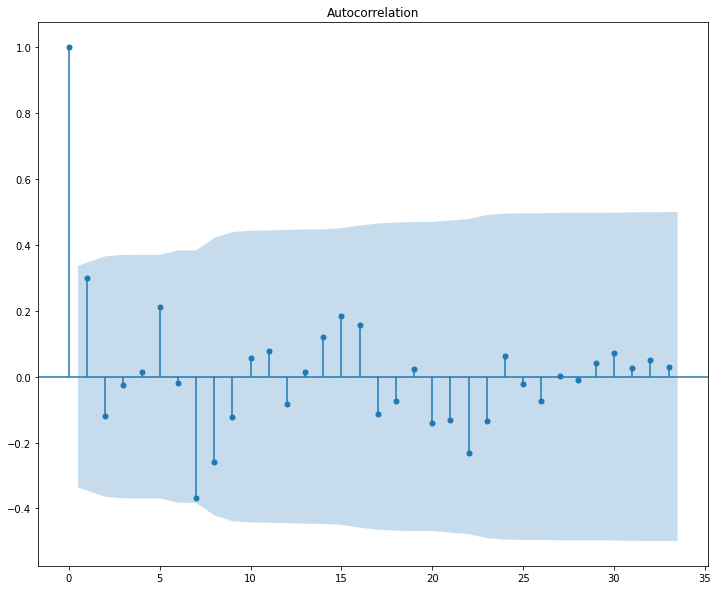

In [74]:
_, ax = plt.subplots(1,1,figsize=(12,10))
plot_acf(temp_data['AC_POWER'], ax=ax, lags=33)
plt.show()

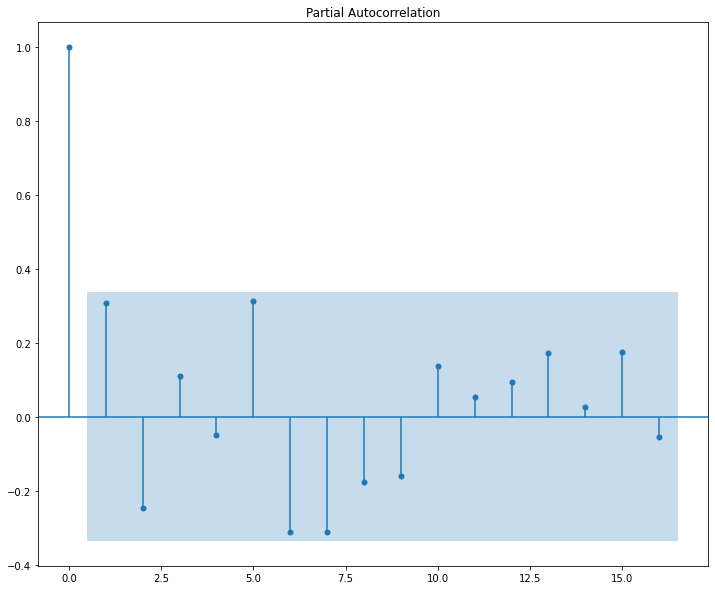

In [75]:
_, ax = plt.subplots(1,1,figsize=(12,10))
plot_pacf(temp_data['AC_POWER'], ax=ax)
plt.show()

In [76]:
adf_test(temp_data['AC_POWER'])

Test Statistic                -2.391838
p-value                        0.144053
Number Lags Used               6.000000
Numer of Observations Used    27.000000
Critical Value (1%)           -3.699608
Critical Value (5%)           -2.976430
Critical Value (10%)          -2.627601
dtype: float64


W/O any differencing there is no evidence of stationarity in the data.

In [77]:
shift_data = np.diff(temp_data['AC_POWER'],n=2)
adf_test(shift_data)

Test Statistic               -5.916080e+00
p-value                       2.570971e-07
Number Lags Used              4.000000e+00
Numer of Observations Used    2.700000e+01
Critical Value (1%)          -3.699608e+00
Critical Value (5%)          -2.976430e+00
Critical Value (10%)         -2.627601e+00
dtype: float64


Applying a 2nd order differencing to the dataset at the daily level indicates that there is finally stationarity in the data.

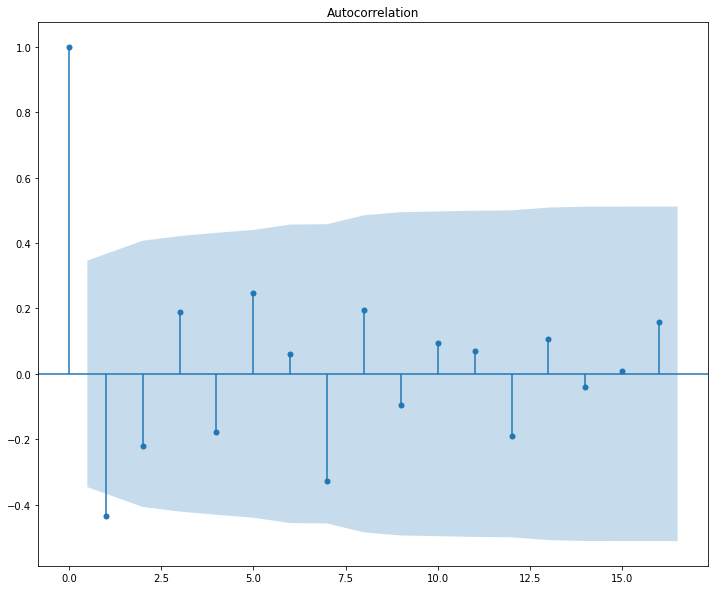

In [78]:
_, ax = plt.subplots(1,1,figsize=(12,10))
plot_acf(shift_data, ax=ax)
plt.show()

/home/thomas/anaconda3/envs/kedro-env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


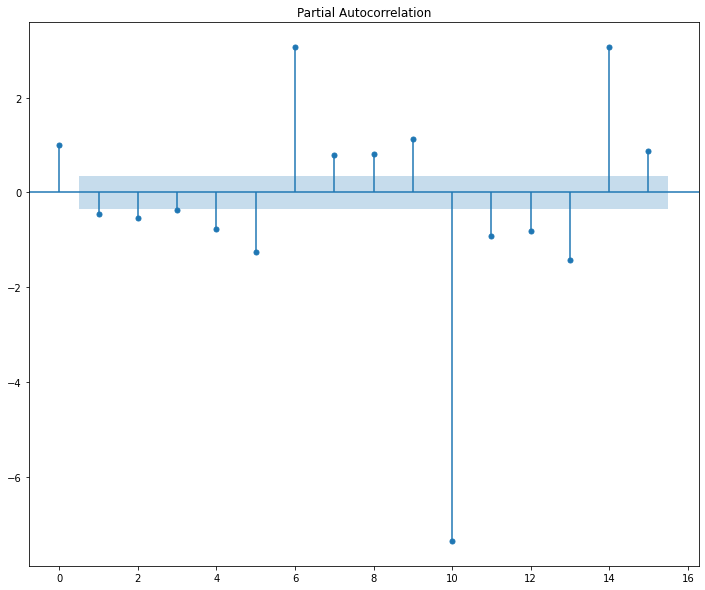

In [79]:
_, ax = plt.subplots(1,1,figsize=(12,10))
plot_pacf(shift_data, lags=15,ax=ax)
plt.show()

In [101]:
sarimodel = SARIMAX(temp_data['AC_POWER'],
                   order = (0,1,1),
                   seasonal_order=(0,1,1,15
                                  ),
                   enforce_stationarity=False,
                   enforce_invertibility=False,
                   freq='D')

res = sarimodel.fit(max_iter=50, method='powell')
print(res.aic, res.bic)



Optimization terminated successfully.
         Current function value: -0.089933
         Iterations: 6
         Function evaluations: 415
-0.1154547652261595 -6.1154547652261595


In [261]:
p = q = range(0,4)
d = range(0,2)
s = range(14,16)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = list(itertools.product(p,d,q,s))

In [211]:
len(seasonal_pdq)*len(pdq)

2048

In [195]:
def arimax_gs(ts, pdq, pdqs, maxiter=50, freq='D',seasonal=False):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='D' for daily. Change to suit your time series frequency
            e.g. 'M' for monthly, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best AIC value
    ans = []
    for comb in pdq:
        if seasonal:
            for seas_comb in seasonal_pdq:
                model = SARIMAX(ts,
                               order=comb,
                               seasonal_order=seas_comb,
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                               freq=freq)

                res = model.fit(maxiter=maxiter, method='powell')
                ans.append([[comb, seas_comb], res.aic, res.bic])
                print(f'SARIMAX {comb} x {seas_comb} resulted in an AIC and BIC of: {res.aic}, {res.bic}')
        else:
            model = ARIMA(
                ts,
                order=comb,
                enforce_stationarity=False,
                enforce_invertibility=False,
                freq=freq
            )
            
            res = model.fit()
            ans.append([[comb], res.aic, res.bic])
            print(f'ARIMA {comb} resulted in an AIC and BIC of: {res.aic}, {res.bic}')
    
        ans_df = pd.DataFrame(ans, columns=['params', 'aic' ,'bic'])
        ans_df = ans_df.dropna(axis=0).sort_values(by=['aic'], ascending=True)[0:5]
        
    
    return ans_df

In [103]:
from warnings import filterwarnings
filterwarnings('ignore')

In [262]:
output = arimax_gs(temp_data['AC_POWER'], pdq, seasonal_pdq, maxiter=100, seasonal=True)
output

Optimization terminated successfully.
         Current function value: 11.357031
         Iterations: 1
         Function evaluations: 11
SARIMAX (0, 0, 0) x (0, 0, 0, 14) resulted in an AIC and BIC of: 774.2781191582785, 775.774626719745
Optimization terminated successfully.
         Current function value: 11.357031
         Iterations: 1
         Function evaluations: 11
SARIMAX (0, 0, 0) x (0, 0, 0, 15) resulted in an AIC and BIC of: 774.2781191582785, 775.774626719745
Optimization terminated successfully.
         Current function value: 6.093584
         Iterations: 2
         Function evaluations: 63
SARIMAX (0, 0, 0) x (0, 0, 1, 14) resulted in an AIC and BIC of: 418.363695563895, 420.2525735222279
Optimization terminated successfully.
         Current function value: 5.643746
         Iterations: 2
         Function evaluations: 65
SARIMAX (0, 0, 0) x (0, 0, 1, 15) resulted in an AIC and BIC of: 387.7747226969588, 389.5554662127511
Optimization terminated successfully.
       

KeyboardInterrupt: 

In [263]:
output1 = arimax_gs(temp_data['AC_POWER'], pdq, seasonal_pdq, maxiter=100)
output1

ARIMA (0, 0, 0) resulted in an AIC and BIC of: 646.8125424147725, 649.8055575377055
ARIMA (0, 0, 1) resulted in an AIC and BIC of: 625.4330622130124, 629.8302699214115
ARIMA (0, 0, 2) resulted in an AIC and BIC of: 608.2522914338838, 613.9882402518243
ARIMA (0, 0, 3) resulted in an AIC and BIC of: 586.4930870272034, 593.4990739355142
ARIMA (0, 1, 0) resulted in an AIC and BIC of: 636.3157325710315, 637.7814684738312
ARIMA (0, 1, 1) resulted in an AIC and BIC of: 611.965630888884, 614.8336052978543
ARIMA (0, 1, 2) resulted in an AIC and BIC of: 588.2406360222325, 592.444228167219
ARIMA (0, 1, 3) resulted in an AIC and BIC of: 570.5015265681193, 575.9707098880651
ARIMA (1, 0, 0) resulted in an AIC and BIC of: 645.5389713002892, 650.0284939846886
ARIMA (1, 0, 1) resulted in an AIC and BIC of: 627.072887513391, 632.93583112459
ARIMA (1, 0, 2) resulted in an AIC and BIC of: 610.0586701243271, 617.2286061467529
ARIMA (1, 0, 3) resulted in an AIC and BIC of: 588.4658022403115, 596.87298653028

,params,aic,bic
15,"[(1, 1, 3)]",566.494561,573.331040
7,"[(0, 1, 3)]",570.501527,575.970710
31,"[(3, 1, 3)]",572.468477,582.039547
23,"[(2, 1, 3)]",573.502824,581.706599
19,"[(2, 0, 3)]",585.044985,594.853366


In [264]:
output.iloc[2].params

[(2, 0, 1), (2, 0, 1, 14)]

In [257]:
params = output.iloc[0].params

better_mod = SARIMAX(
    temp_data['AC_POWER'],
    order = params[0],
    seasonal_order = params[1],
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq='D'
)

res2 = better_mod.fit(maxiter=100, method='powell')
print(res2.summary())

Optimization terminated successfully.
         Current function value: -1.509021
         Iterations: 35
         Function evaluations: 3170
                                     SARIMAX Results                                      
Dep. Variable:                           AC_POWER   No. Observations:                   34
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 14)   Log Likelihood                  51.307
Date:                            Tue, 21 Sep 2021   AIC                            -92.613
Time:                                    14:33:53   BIC                            -95.682
Sample:                                05-15-2020   HQIC                           -99.347
                                     - 06-17-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

In [258]:
another_model = ARIMA(
    temp_data['AC_POWER'],
    order= output1.iloc[1].params[0],
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq='D'
)

res3 = another_model.fit()
print(res3.summary())


                               SARIMAX Results                                
Dep. Variable:               AC_POWER   No. Observations:                   34
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -281.251
Date:                Tue, 21 Sep 2021   AIC                            570.502
Time:                        17:04:42   BIC                            575.971
Sample:                    05-15-2020   HQIC                           572.214
                         - 06-17-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3666      0.247     -1.483      0.138      -0.851       0.118
ma.L2         -0.5497      0.168     -3.268      0.001      -0.879      -0.220
ma.L3          0.0928      0.236      0.393      0.6

Optimization terminated successfully.
         Current function value: -1.509021
         Iterations: 35
         Function evaluations: 3170
Optimization terminated successfully.
         Current function value: -1.509021
         Iterations: 35
         Function evaluations: 3170
Optimization terminated successfully.
         Current function value: -1.509021
         Iterations: 35
         Function evaluations: 3170
Optimization terminated successfully.
         Current function value: -1.509021
         Iterations: 35
         Function evaluations: 3170
Optimization terminated successfully.
         Current function value: -1.509021
         Iterations: 35
         Function evaluations: 3170


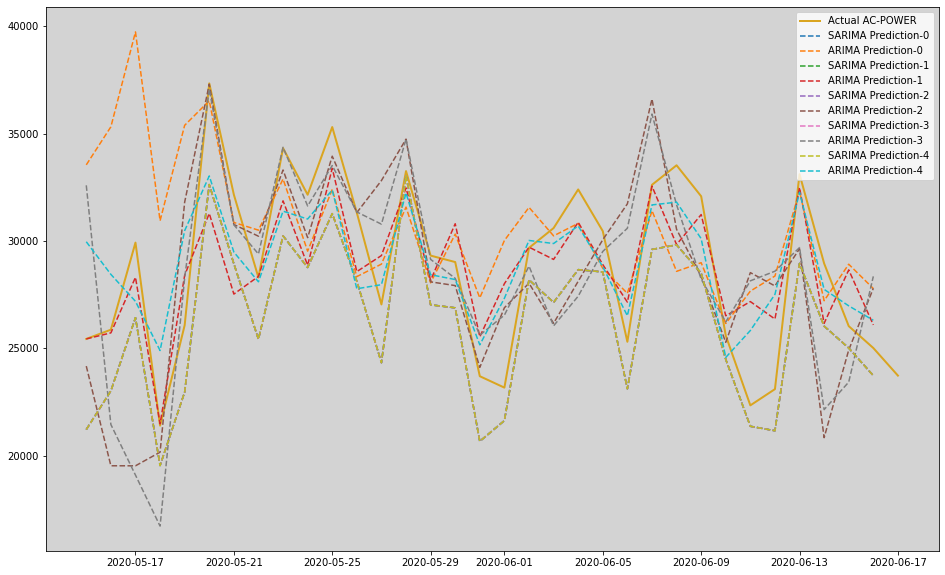

In [245]:
_, ax = plt.subplots(1,1,figsize=(16,10))
ax.set_facecolor('lightgray')
ax.plot(temp_data['AC_POWER'], linestyle='-', linewidth=2, color='goldenrod', label = 'Actual AC-POWER')

for i in range(5):
    order = output.iloc[i].params
    
    res2 = SARIMAX(
    temp_data['AC_POWER'],
    order = params[0],
    seasonal_order = params[1],
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq='D').fit(maxiter=100, method='powell')
    
    res3 = ARIMA(
    temp_data['AC_POWER'],
    order= output1.iloc[i].params[0],
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq='D').fit()


    ax.plot(res2.predict().shift(-1), linestyle='--',  label = f'SARIMA Prediction-{i}')
    ax.plot(res3.predict().shift(-1), linestyle='--',  label= f'ARIMA Prediction-{i}')
plt.legend(loc='center left', bbox_to_anchor =(1,0.5))
plt.show()